In [1]:
from pathlib import Path
import numpy as np
import cv2
from scipy import stats
from PIL import Image


def imshow(a):
  a = a.clip(0, 255).astype('uint8')
  if a.ndim == 3:
    if a.shape[2] == 4:
      a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
    else:
      a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
  display(Image.fromarray(a))


def load_images(path):
    images = []
    path = Path(path)
    for img in path.glob('*.jpg'):
        images.append(cv2.imread(str(img)))
    images = np.array(images)
    imshow(np.concatenate(images, axis=1))

    return images


def turn_into_grayscale(images):
    return np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images])


def display_images(images):
    imshow(np.concatenate(images, axis=1))


def check_majority(images):
    pass



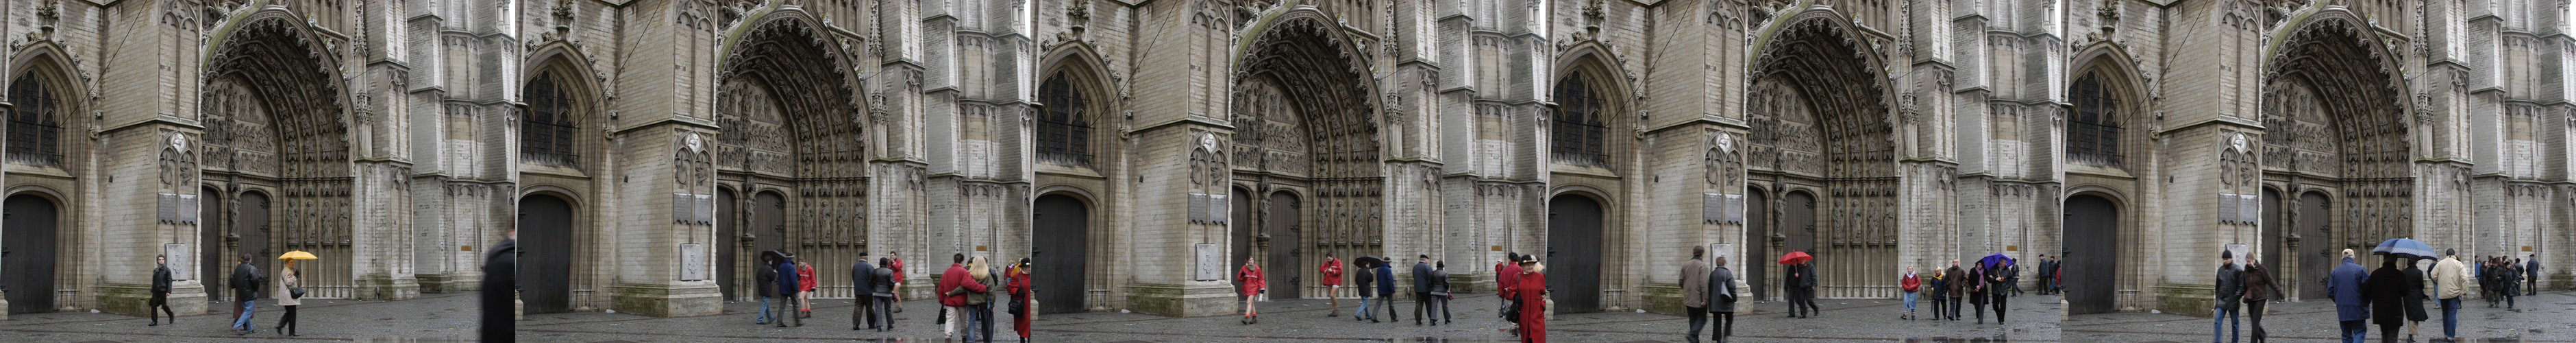

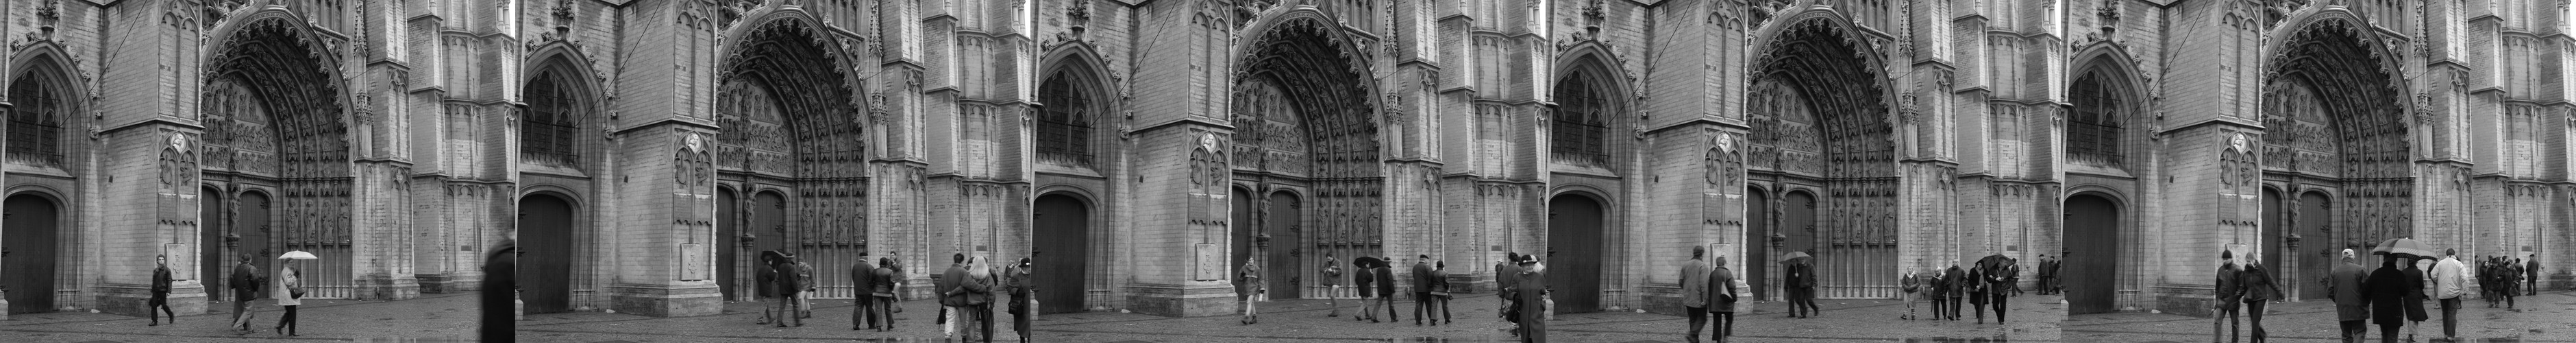

In [2]:
imgs = load_images('cathedral/')
imgs_grayscale = turn_into_grayscale(imgs)
display_images(imgs_grayscale)

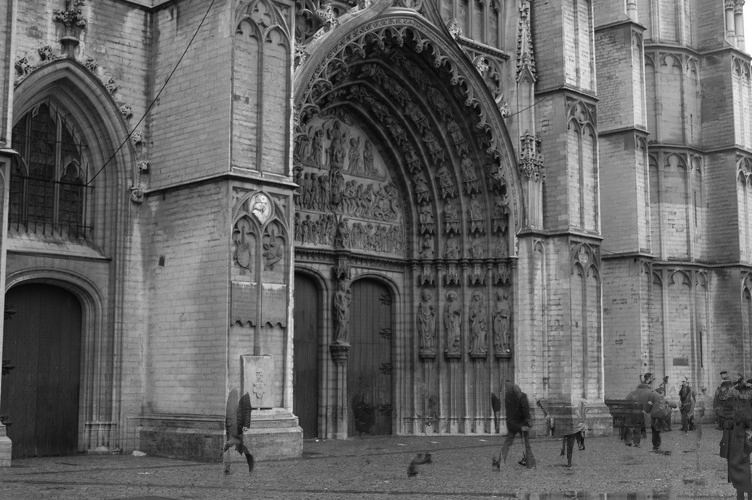

In [3]:
# filtr medianowy

imshow(np.median(imgs_grayscale, axis=0))

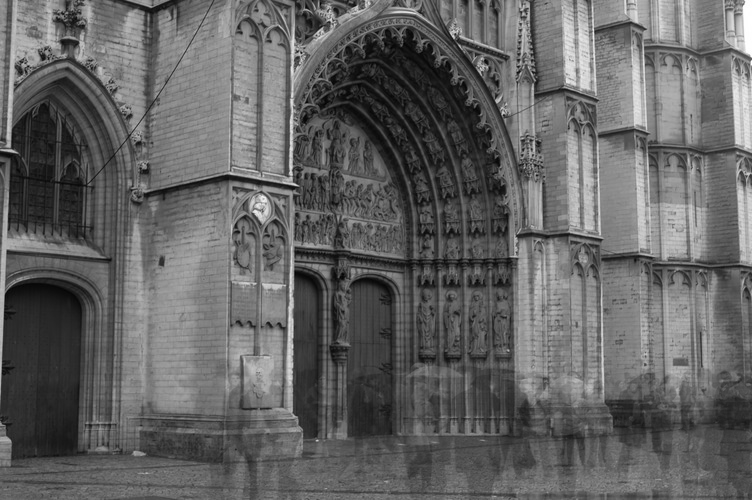

In [4]:
# średnia

imshow(np.mean(imgs_grayscale, axis=0))

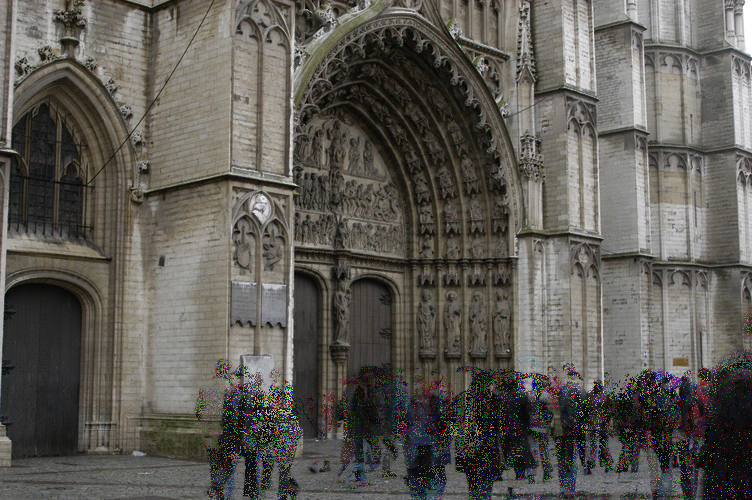

In [5]:
# coś nie działa, nie wiem co

test_r = stats.mode(imgs, axis=0)

imshow(test_r.mode)

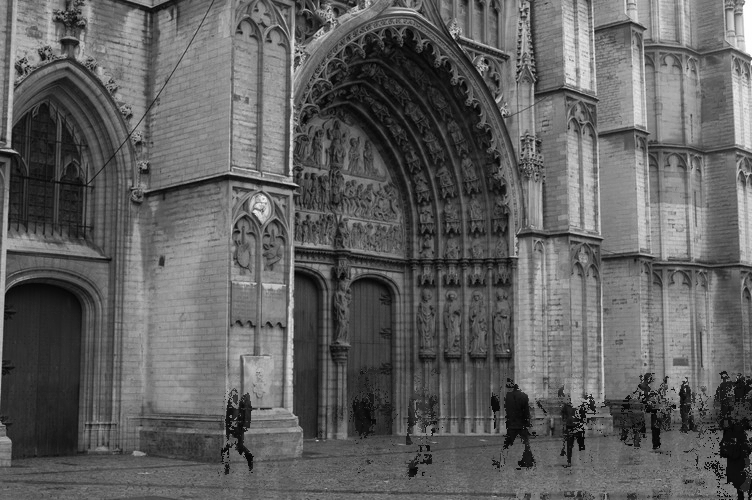

In [6]:
# próbowałem tu zrobić maximal likelihood, ale działa chujowo

n, x, y = imgs_grayscale.shape

new_img = np.zeros((x, y))

for i in range(x):
    for j in range(y):
        px = imgs_grayscale[:,i,j]
        counts, values = np.histogram(px, bins=n, range=(min(px), max(px)))
        new_img[i,j] = values[np.argmax(counts)]

imshow(new_img)

In [ ]:
# Znalazłem funkcję calcHist w cv2 ale nie chciało mi się już jej testować